In [7]:
import pandas as pd
df = pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
#Drop Non-Useful Columns
df_features = df.drop(columns=["Channel", "Region"])

In [17]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)


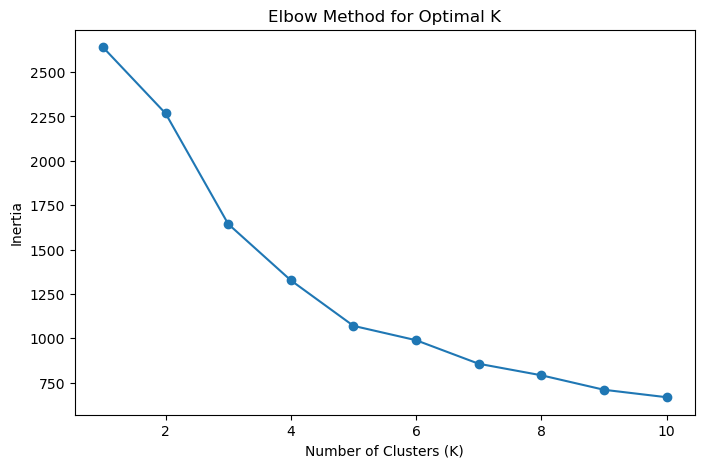

In [35]:
#Elbow Method to Find Optimal K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.savefig("Elbow plot")
plt.show()


In [31]:
#Train KMeans Model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df["Cluster"] = clusters

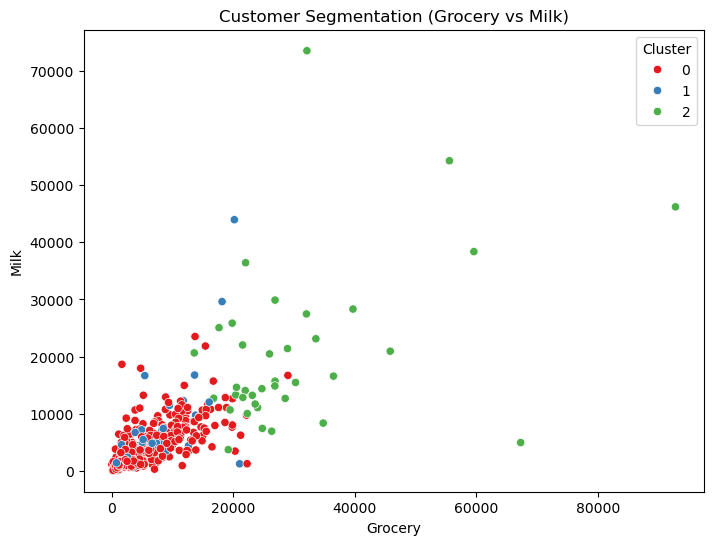

In [37]:
#Visualize Clusters
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Grocery"],
    y=df["Milk"],
    hue=df["Cluster"],
    palette="Set1"
)
plt.title("Customer Segmentation (Grocery vs Milk)")
plt.savefig("Cluster visualization")
plt.show()


In [25]:
#Cluster Interpretation
cluster_labels = {
    0: "Retail Customers",
    1: "Medium Businesses",
    2: "Small Buyers"
}
df["Customer_Type"] = df["Cluster"].map(cluster_labels)


In [27]:
#Export Segmented Dataset
df.to_csv("segmented_wholesale_customers.csv", index=False)
